<a href="https://colab.research.google.com/github/ainunsw3/data-ulasan/blob/main/SVM_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Pengumpulan Data**

In [ ]:
pip install google-play-scraper

In [ ]:
from google_play_scraper import app
#import library
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all #semua ulasan

result1 = reviews_all(
    'com.glints.candidate',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # bahasa'
    country='id', # negara
    sort=Sort.MOST_RELEVANT,
    filter_score_with=None # semua skor
)

In [ ]:
df_review = pd.DataFrame(np.array(result1),columns=['review']) #membuat sebuah DataFrame Pandas baru dengan menggunakan data dari variabel result.
df_review = df_review.join(pd.DataFrame(df_review.pop('review').tolist())) #
df_review.head() #menampilkan data 5 teratas

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8616957d-3d12-4303-83da-6a0e3b1ca50b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sangat membantu sekali untuk berkomun...,5,59,1.50.1,2024-05-31 06:15:14,Hi Surya! Terima kasih atas ulasan Anda! Kami ...,2024-05-31 06:17:38,1.50.1
1,c34511cd-124a-42df-a5b7-7472a989e539,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sebenarnya bagus tapi seharusnya b...,3,32,1.48.2,2024-05-07 03:00:06,Halo Luis! Mohon maaf atas kendala yang Anda a...,2024-05-07 03:04:51,1.48.2
2,51112d8c-b7ee-42b6-8f1d-40505bdb007b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mengapa tidak ada lowongan di kota yang saya f...,1,2,1.49.2,2024-05-29 00:18:39,Halo Denny! Mohon maaf atas kendala yang Anda ...,2024-05-29 01:07:49,1.49.2
3,82096223-e7f1-4a75-bd2a-69fdebebf7d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terimakasih buat aplikasi Glints,Baru pertama ...",5,97,1.49.1,2024-05-21 12:50:57,Hi Anisaa! Terima kasih atas ulasan Anda! Kami...,2024-05-22 01:13:20,1.49.1
4,33bca57c-c0a3-4e4f-a16f-7bdcdfd36581,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menggunakan applikasi glints sangat cocok untu...,5,69,1.49.2,2024-05-20 04:27:26,Hi Novi! Terima kasih atas ulasan Anda! Kami s...,2024-05-20 04:30:26,1.49.2


In [ ]:
len(df_review.index) #hitung berapa jumlah data yg didapatkan

7353

In [ ]:
#memilih kolom yang digunakan
df_new = df_review[['userName', 'score','at', 'content']]
sorted_df = df_new.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
7127,Pengguna Google,2,2024-06-09 11:34:09,Yg dipanggil ga sesuai rata2nya
7164,Pengguna Google,5,2024-06-09 10:04:04,Bismillah semoga keterima kerja
5414,Pengguna Google,4,2024-06-09 04:53:31,bagus ada fitur bs kirim chat sblm melamar bar...
5435,Pengguna Google,5,2024-06-09 03:57:38,"Terima kasih Glints, prosesnya benar-benar cep..."
5432,Pengguna Google,5,2024-06-09 02:17:45,sangat membantu


In [ ]:
#filter date
start_date = '2021-01-01'
end_date = '2024-02-28'

filtered_df = df_new[(df_new['at'] >= start_date) & (df_new['at'] <= end_date)]

print(filtered_df)

             userName  score                  at  \
21    Pengguna Google      2 2024-02-05 04:06:16   
31    Pengguna Google      5 2024-02-12 08:36:50   
43    Pengguna Google      5 2024-02-07 08:53:18   
49    Pengguna Google      5 2024-02-20 14:23:35   
65    Pengguna Google      3 2024-01-17 22:41:02   
...               ...    ...                 ...   
7348  Pengguna Google      5 2023-03-19 13:35:36   
7349  Pengguna Google      5 2022-09-21 02:14:37   
7350  Pengguna Google      5 2023-02-21 12:14:09   
7351  Pengguna Google      5 2022-02-24 05:11:45   
7352  Pengguna Google      5 2023-03-03 08:28:42   

                                                content  
21    1. Mesin pencarian menampilkan hasil yang sang...  
31    Wahhh bagus banget aplikasi nya sangat berguna...  
43    Aplikasinya bagus untuk pencari kerja karena b...  
49    Aplikasi yang mantep banget buat anak muda bar...  
65    Aplikasi nya ok, untuk mencari pekerjaan mudah...  
...                        

In [ ]:
len(filtered_df.index)

6277

In [ ]:
#menemukan missing value
print('Jumlah missing values disetiap kolom:\n', filtered_df.isnull().sum())

Jumlah missing values disetiap kolom:
 userName    0
score       0
at          0
content     0
dtype: int64


In [ ]:
#menghitung duplikasi data
filtered_df.duplicated().sum()

0

## **Pelabelan Data**

## translate

In [ ]:
!pip install googletrans==3.1.0a0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=1ba507f7cd6441c6de8ead00fb899b49c4d351b560fa549c3fbb80396090c848
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
from googletrans import Translator
import pandas as pd
import googletrans

In [ ]:
df = pd.read_csv('drive/MyDrive/data ulasan/ulasan_data_filterDate.csv')
df.head()

,userName,score,at,content
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah..."


In [ ]:
translator = Translator()

text = df['content'].unique()

def translate_text(text,  dest='en'):
    trans_txt = translator.translate(text, dest=dest).text
    return trans_txt

df['translate_en'] = ''

df['translate_en'] = df['content'].apply(translate_text)

print(df)

             userName  score                at  \
0     Pengguna Google      2   02/05/2024 4:06   
1     Pengguna Google      5   02/12/2024 8:36   
2     Pengguna Google      5   02/07/2024 8:53   
3     Pengguna Google      5  02/20/2024 14:23   
4     Pengguna Google      3  01/17/2024 22:41   
...               ...    ...               ...   
6131  Pengguna Google      5  03/19/2023 13:35   
6132  Pengguna Google      5   09/21/2022 2:14   
6133  Pengguna Google      5  02/21/2023 12:14   
6134  Pengguna Google      5   02/24/2022 5:11   
6135  Pengguna Google      5   03/03/2023 8:28   

                                                content  \
0     1. Mesin pencarian menampilkan hasil yang sang...   
1     Wahhh bagus banget aplikasi nya sangat berguna...   
2     Aplikasinya bagus untuk pencari kerja karena b...   
3     Aplikasi yang mantep banget buat anak muda bar...   
4     Aplikasi nya ok, untuk mencari pekerjaan mudah...   
...                                          

In [ ]:
df.head()

,userName,score,at,content,translate_en
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use..."
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,..."


In [ ]:
df.to_csv('ulasan_translate.csv', index = False)

## labeling lexicon

In [ ]:
!pip install VaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data_df = pd.read_csv('drive/MyDrive/data ulasan/ulasan_translate.csv')
data_df.head()

,userName,score,at,content,translate_en
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use..."
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,..."


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data_df['translate_en'] = data_df['translate_en'].astype(str)
score = [analyzer.polarity_scores(x) for x in data_df['translate_en']]
print(score)
data_df['score_polarity'] = [x['compound'] for x in score]
data_df.head()

[{'neg': 0.096, 'neu': 0.865, 'pos': 0.039, 'compound': -0.4456}, {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9676}, {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9111}, {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9273}, {'neg': 0.049, 'neu': 0.75, 'pos': 0.201, 'compound': 0.7266}, {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.9035}, {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.91}, {'neg': 0.087, 'neu': 0.854, 'pos': 0.06, 'compound': -0.2621}, {'neg': 0.135, 'neu': 0.799, 'pos': 0.066, 'compound': -0.4588}, {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.8258}, {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.9366}, {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9095}, {'neg': 0.151, 'neu': 0.749, 'pos': 0.099, 'compound': -0.3762}, {'neg': 0.114, 'neu': 0.761, 'pos': 0.125, 'compound': 0.224}, {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.9019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'n

,userName,score,at,content,translate_en,score_polarity
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266


In [ ]:
data_df.loc[data_df['score_polarity'] > 0, 'sentimen'] = 'Positif'
data_df.loc[data_df['score_polarity'] == 0, 'sentimen'] = 'Netral'
data_df.loc[data_df['score_polarity'] < 0, 'sentimen'] = 'Negatif'

data_df.head(10)

,userName,score,at,content,translate_en,score_polarity,sentimen
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif
5,Pengguna Google,5,01/27/2024 9:08,Apknya sudah lumayan bagus. namun masih ada ke...,"The apk is pretty good. However, there are sti...",0.9035,Positif
6,Pengguna Google,1,02/05/2024 3:15,"Sebenarnya, aplikasi ini bagus, ya, namun, hal...","Actually, this application is good, yes, howev...",0.9100,Positif
7,Pengguna Google,2,01/18/2024 0:34,Glints lagi ngebug ya? Masa masukin password a...,"Glints is bugging, right? Can't just enter the...",-0.2621,Negatif
8,Pengguna Google,1,01/23/2024 8:22,"Fitur filter nya ga berguna.. set tanggal, tet...","The filter feature is useless.. set the date, ...",-0.4588,Negatif
9,Pengguna Google,5,01/02/2024 4:30,Aplikasi yang bagus memabantu para pencari ker...,"Application that can help job seekers, lots of...",0.8258,Positif


### **Visualisasi**

In [ ]:
#mengelompokkan data berdasarkan nilai kolom sentimen
temp = data_df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content', ascending=False)
#menerapkan gradien
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
2,Positif,4922
1,Netral,844
0,Negatif,370


In [ ]:
#menemukan missing value
print('Jumlah missing values disetiap kolom:\n', data_df.isnull().sum())

Jumlah missing values disetiap kolom:
 userName          0
score             0
at                0
content           0
translate_en      0
score_polarity    0
sentimen          0
dtype: int64


In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
ulasan = data_df.replace('',np.nan, regex=True)
ulasan = data_df.dropna()

In [ ]:
ulasan = data_df.reset_index(drop=True)

In [ ]:
print(data_df['sentimen'].value_counts())

sentimen
Positif    4922
Netral      844
Negatif     370
Name: count, dtype: int64


In [ ]:
#remove sentimen netral
ulasan = data_df.drop(data_df[data_df['sentimen']=='netral'].index)
ulasan = ulasan.reset_index(drop=True)

In [ ]:
len(data_df.index) #hitung berapa jumlah data yg didapatkan

6136

In [ ]:
ulasan.head(10)

,userName,score,at,content,translate_en,score_polarity,sentimen
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif
5,Pengguna Google,5,01/27/2024 9:08,Apknya sudah lumayan bagus. namun masih ada ke...,"The apk is pretty good. However, there are sti...",0.9035,Positif
6,Pengguna Google,1,02/05/2024 3:15,"Sebenarnya, aplikasi ini bagus, ya, namun, hal...","Actually, this application is good, yes, howev...",0.9100,Positif
7,Pengguna Google,2,01/18/2024 0:34,Glints lagi ngebug ya? Masa masukin password a...,"Glints is bugging, right? Can't just enter the...",-0.2621,Negatif
8,Pengguna Google,1,01/23/2024 8:22,"Fitur filter nya ga berguna.. set tanggal, tet...","The filter feature is useless.. set the date, ...",-0.4588,Negatif
9,Pengguna Google,5,01/02/2024 4:30,Aplikasi yang bagus memabantu para pencari ker...,"Application that can help job seekers, lots of...",0.8258,Positif


In [ ]:
data_df.to_csv('hasil_lexicon_new.csv', index = False)

## **Text Preprocessing**

### Case Folding

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#membaca data
ulasan = pd.read_csv('drive/MyDrive/data ulasan/hasil_lexicon_new.csv')
ulasan.head()

,userName,score,at,content,translate_en,score_polarity,sentimen
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif


In [ ]:
import re
#penghapusan karakter
def cleaningKarakter(ulasan_text):
  #hapus angka
  cleaning_text = re.sub(r'\d+', " ", ulasan_text)
  #hapus karakter
  cleaning_text= re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", cleaning_text)
  return cleaning_text
ulasan['case_folding'] = ulasan['content'].apply(lambda cleaning_text: cleaningKarakter(cleaning_text))

#mengubah huruf kapital ke huruf kecil
def lower_content(ulasan_text):
  lower = ulasan_text.lower()
  return lower
ulasan['case_folding'] = ulasan['case_folding'].apply(lambda lower:lower_content(str(lower)))
ulasan.head(10)

,userName,score,at,content,translate_en,score_polarity,sentimen,case_folding
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif,mesin pencarian menampilkan hasil yang sang...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif,wahhh bagus banget aplikasi nya sangat berguna...
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif,aplikasinya bagus untuk pencari kerja karena b...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif,aplikasi yang mantep banget buat anak muda bar...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif,aplikasi nya ok untuk mencari pekerjaan mudah...
5,Pengguna Google,5,01/27/2024 9:08,Apknya sudah lumayan bagus. namun masih ada ke...,"The apk is pretty good. However, there are sti...",0.9035,Positif,apknya sudah lumayan bagus namun masih ada ke...
6,Pengguna Google,1,02/05/2024 3:15,"Sebenarnya, aplikasi ini bagus, ya, namun, hal...","Actually, this application is good, yes, howev...",0.9100,Positif,sebenarnya aplikasi ini bagus ya namun hal...
7,Pengguna Google,2,01/18/2024 0:34,Glints lagi ngebug ya? Masa masukin password a...,"Glints is bugging, right? Can't just enter the...",-0.2621,Negatif,glints lagi ngebug ya masa masukin password a...
8,Pengguna Google,1,01/23/2024 8:22,"Fitur filter nya ga berguna.. set tanggal, tet...","The filter feature is useless.. set the date, ...",-0.4588,Negatif,fitur filter nya ga berguna set tanggal tet...
9,Pengguna Google,5,01/02/2024 4:30,Aplikasi yang bagus memabantu para pencari ker...,"Application that can help job seekers, lots of...",0.8258,Positif,aplikasi yang bagus memabantu para pencari ker...


### Penghapusan Stopwords

In [ ]:
#import library nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#mengunduh stopwords
kata_stopword = stopwords.words('indonesian') + stopwords.words('english')

#daftar tambahan stopwords manual
kata_stopword.extend(["yg", "jd", "si", "sy", "ttg", "krn", "ok", "nya", "tp", "udh", "gk",
                      "utk", "dlu", "ya", "lgi", "gx", "deh", "g", "wahhh", "ga", "ah", "abk", "ah", "aj", "aq",
                      "yu", "yh", "yke", "taii", "wkwk","wkwkw","wkwkwk","wkwkwkwk","anjay", "njir", "hehe", "hehehe", "mwehehe"])
kata_stopword = set(kata_stopword)

def removeStopword(ulasan_text):
  filter_kata = [word for word in ulasan_text.split() if word not in kata_stopword]
  return ' '.join(filter_kata)

ulasan['remove_stopword'] = ulasan['case_folding'].apply(lambda filter_kata:removeStopword(str(filter_kata)))

def word_repetition(review_text):
  ulasan_kata = re.sub(r'(.)\1+', r'\1\1', review_text)
  return ulasan_kata

ulasan['remove_stopword'] = ulasan['remove_stopword'].apply(lambda word: word_repetition(word))
ulasan.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,userName,score,at,content,translate_en,score_polarity,sentimen,case_folding,remove_stopword
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif,mesin pencarian menampilkan hasil yang sang...,mesin pencarian menampilkan hasil relevan munc...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif,wahhh bagus banget aplikasi nya sangat berguna...,bagus banget aplikasi berguna mencari lowongan...
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif,aplikasinya bagus untuk pencari kerja karena b...,aplikasinya bagus pencari kerja loker tersedia...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif,aplikasi yang mantep banget buat anak muda bar...,aplikasi mantep banget anak muda lulus nyari l...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif,aplikasi nya ok untuk mencari pekerjaan mudah...,aplikasi mencari pekerjaan mudah perbarui aman...
5,Pengguna Google,5,01/27/2024 9:08,Apknya sudah lumayan bagus. namun masih ada ke...,"The apk is pretty good. However, there are sti...",0.9035,Positif,apknya sudah lumayan bagus namun masih ada ke...,apknya lumayan bagus kekurangannya mencari low...
6,Pengguna Google,1,02/05/2024 3:15,"Sebenarnya, aplikasi ini bagus, ya, namun, hal...","Actually, this application is good, yes, howev...",0.9100,Positif,sebenarnya aplikasi ini bagus ya namun hal...,aplikasi bagus lowongan pekerjaan aplikasi dib...
7,Pengguna Google,2,01/18/2024 0:34,Glints lagi ngebug ya? Masa masukin password a...,"Glints is bugging, right? Can't just enter the...",-0.2621,Negatif,glints lagi ngebug ya masa masukin password a...,glints ngebug masukin password aja gak passwor...
8,Pengguna Google,1,01/23/2024 8:22,"Fitur filter nya ga berguna.. set tanggal, tet...","The filter feature is useless.. set the date, ...",-0.4588,Negatif,fitur filter nya ga berguna set tanggal tet...,fitur filter berguna set tanggal muncul releva...
9,Pengguna Google,5,01/02/2024 4:30,Aplikasi yang bagus memabantu para pencari ker...,"Application that can help job seekers, lots of...",0.8258,Positif,aplikasi yang bagus memabantu para pencari ker...,aplikasi bagus memabantu pencari kerja info lo...


### Tokenizing

In [ ]:
import nltk
nltk.download('punkt')
#import word_tokenizing dari nltk
from nltk.tokenize import word_tokenize

def tokenizing(ulasan_text):
  ulasan_text = word_tokenize(ulasan_text)
  return ulasan_text
#menerapkan tokenizing pada kolom hasil stopword dan hasil disimpan pada kolom tokenizing
ulasan['Tokenizing'] = ulasan['remove_stopword'].apply(tokenizing)

ulasan.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,userName,score,at,content,translate_en,score_polarity,sentimen,case_folding,remove_stopword,Tokenizing
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif,mesin pencarian menampilkan hasil yang sang...,mesin pencarian menampilkan hasil relevan munc...,"[mesin, pencarian, menampilkan, hasil, relevan..."
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif,wahhh bagus banget aplikasi nya sangat berguna...,bagus banget aplikasi berguna mencari lowongan...,"[bagus, banget, aplikasi, berguna, mencari, lo..."
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif,aplikasinya bagus untuk pencari kerja karena b...,aplikasinya bagus pencari kerja loker tersedia...,"[aplikasinya, bagus, pencari, kerja, loker, te..."
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif,aplikasi yang mantep banget buat anak muda bar...,aplikasi mantep banget anak muda lulus nyari l...,"[aplikasi, mantep, banget, anak, muda, lulus, ..."
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif,aplikasi nya ok untuk mencari pekerjaan mudah...,aplikasi mencari pekerjaan mudah perbarui aman...,"[aplikasi, mencari, pekerjaan, mudah, perbarui..."


### Stemming

In [ ]:
#install library satrawi
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmingText(ulasan_text):
  stemming = StemmerFactory().create_stemmer()
  token_stemmer = [stemming.stem(word) for word in ulasan_text]
  return ' '.join(token_stemmer)

#menerapkan tokenizing pada kolom hasil stopword dan hasil disimpan pada kolom tokenizing
ulasan['Stemming'] = ulasan['Tokenizing'].apply(stemmingText)
ulasan.head(10)

,userName,score,at,content,translate_en,score_polarity,sentimen,case_folding,remove_stopword,Tokenizing,Stemming
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif,mesin pencarian menampilkan hasil yang sang...,mesin pencarian menampilkan hasil relevan munc...,"[mesin, pencarian, menampilkan, hasil, relevan...",mesin cari tampil hasil relevan muncul notifik...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif,wahhh bagus banget aplikasi nya sangat berguna...,bagus banget aplikasi berguna mencari lowongan...,"[bagus, banget, aplikasi, berguna, mencari, lo...",bagus banget aplikasi guna cari lowong kerja t...
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif,aplikasinya bagus untuk pencari kerja karena b...,aplikasinya bagus pencari kerja loker tersedia...,"[aplikasinya, bagus, pencari, kerja, loker, te...",aplikasi bagus cari kerja loker sedia bantu ca...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif,aplikasi yang mantep banget buat anak muda bar...,aplikasi mantep banget anak muda lulus nyari l...,"[aplikasi, mantep, banget, anak, muda, lulus, ...",aplikasi mantep banget anak muda lulus nyari l...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif,aplikasi nya ok untuk mencari pekerjaan mudah...,aplikasi mencari pekerjaan mudah perbarui aman...,"[aplikasi, mencari, pekerjaan, mudah, perbarui...",aplikasi cari kerja mudah baru aman buka baru ...
5,Pengguna Google,5,01/27/2024 9:08,Apknya sudah lumayan bagus. namun masih ada ke...,"The apk is pretty good. However, there are sti...",0.9035,Positif,apknya sudah lumayan bagus namun masih ada ke...,apknya lumayan bagus kekurangannya mencari low...,"[apknya, lumayan, bagus, kekurangannya, mencar...",apknya lumayan bagus kurang cari lowong kerja ...
6,Pengguna Google,1,02/05/2024 3:15,"Sebenarnya, aplikasi ini bagus, ya, namun, hal...","Actually, this application is good, yes, howev...",0.9100,Positif,sebenarnya aplikasi ini bagus ya namun hal...,aplikasi bagus lowongan pekerjaan aplikasi dib...,"[aplikasi, bagus, lowongan, pekerjaan, aplikas...",aplikasi bagus lowong kerja aplikasi bilang ak...
7,Pengguna Google,2,01/18/2024 0:34,Glints lagi ngebug ya? Masa masukin password a...,"Glints is bugging, right? Can't just enter the...",-0.2621,Negatif,glints lagi ngebug ya masa masukin password a...,glints ngebug masukin password aja gak passwor...,"[glints, ngebug, masukin, password, aja, gak, ...",glints ngebug masukin password aja gak passwor...
8,Pengguna Google,1,01/23/2024 8:22,"Fitur filter nya ga berguna.. set tanggal, tet...","The filter feature is useless.. set the date, ...",-0.4588,Negatif,fitur filter nya ga berguna set tanggal tet...,fitur filter berguna set tanggal muncul releva...,"[fitur, filter, berguna, set, tanggal, muncul,...",fitur filter guna set tanggal muncul relevansi...
9,Pengguna Google,5,01/02/2024 4:30,Aplikasi yang bagus memabantu para pencari ker...,"Application that can help job seekers, lots of...",0.8258,Positif,aplikasi yang bagus memabantu para pencari ker...,aplikasi bagus memabantu pencari kerja info lo...,"[aplikasi, bagus, memabantu, pencari, kerja, i...",aplikasi bagus memabantu cari kerja info lowon...


In [ ]:
len(ulasan.index) #hitung berapa jumlah data yg didapatkan

5292

In [ ]:
ulasan = ulasan.replace('',np.nan, regex=True)
ulasan = ulasan.dropna()

In [ ]:
ulasan = ulasan.reset_index(drop=True)

In [ ]:
len(ulasan.index)

5121

In [ ]:
ulasan.to_csv("preprocessing_newy.csv", index = False)  #kemudian save menjadi file csv

## **PEMBOBOTAN KATA**

In [ ]:
import pandas as pd
import numpy as np

ulasan = pd.read_csv('drive/MyDrive/data ulasan/preprocessing_newy.csv')
ulasan.head()

,userName,score,at,content,translate_en,score_polarity,sentimen,case_folding,remove_stopword,Tokenizing,Stemming
0,Pengguna Google,2,02/05/2024 4:06,1. Mesin pencarian menampilkan hasil yang sang...,1. Search engines return very NOT relevant res...,-0.4456,Negatif,mesin pencarian menampilkan hasil yang sang...,mesin pencarian menampilkan hasil relevan munc...,"['mesin', 'pencarian', 'menampilkan', 'hasil',...",mesin cari tampil hasil relevan muncul notifik...
1,Pengguna Google,5,02/12/2024 8:36,Wahhh bagus banget aplikasi nya sangat berguna...,"Wow, this application is really good, very use...",0.9676,Positif,wahhh bagus banget aplikasi nya sangat berguna...,bagus banget aplikasi berguna mencari lowongan...,"['bagus', 'banget', 'aplikasi', 'berguna', 'me...",bagus banget aplikasi guna cari lowong kerja t...
2,Pengguna Google,5,02/07/2024 8:53,Aplikasinya bagus untuk pencari kerja karena b...,The application is good for job seekers becaus...,0.9111,Positif,aplikasinya bagus untuk pencari kerja karena b...,aplikasinya bagus pencari kerja loker tersedia...,"['aplikasinya', 'bagus', 'pencari', 'kerja', '...",aplikasi bagus cari kerja loker sedia bantu ca...
3,Pengguna Google,5,02/20/2024 14:23,Aplikasi yang mantep banget buat anak muda bar...,A really great application for young people wh...,0.9273,Positif,aplikasi yang mantep banget buat anak muda bar...,aplikasi mantep banget anak muda lulus nyari l...,"['aplikasi', 'mantep', 'banget', 'anak', 'muda...",aplikasi mantep banget anak muda lulus nyari l...
4,Pengguna Google,3,01/17/2024 22:41,"Aplikasi nya ok, untuk mencari pekerjaan mudah...","The application is ok, it's easy to find work,...",0.7266,Positif,aplikasi nya ok untuk mencari pekerjaan mudah...,aplikasi mencari pekerjaan mudah perbarui aman...,"['aplikasi', 'mencari', 'pekerjaan', 'mudah', ...",aplikasi cari kerja mudah baru aman buka baru ...


In [ ]:
#import library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

#token untuk tempat nilai stemming
token = {}
token = ulasan['Stemming'].to_dict()
vectorizer = TfidfVectorizer(use_idf=True, lowercase=False)

tf = vectorizer.fit_transform(token.values())
df = pd.DataFrame(tf.todense().tolist(), columns=vectorizer.get_feature_names_out())
print(df)

      aamiin  aaminn  aammiinn  abal  abg  abis  abiss  absurd  abu  acc  ...  \
0        0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
1        0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
2        0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
3        0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
4        0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
...      ...     ...       ...   ...  ...   ...    ...     ...  ...  ...  ...   
5116     0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
5117     0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
5118     0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
5119     0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   
5120     0.0     0.0       0.0   0.0  0.0   0.0    0.0     0.0  0.0  0.0  ...   

      yogyakarta  yok  yokk

In [ ]:
print(tf)

  (0, 241)	0.09578123705544231
  (0, 2025)	0.0896412081644823
  (0, 465)	0.11775457114323355
  (0, 1734)	0.19975380255153988
  (0, 165)	0.11678872369579509
  (0, 1224)	0.17376066117751549
  (0, 558)	0.11775457114323355
  (0, 447)	0.38589450272448356
  (0, 3441)	0.16330690846409318
  (0, 1780)	0.055402720565444624
  (0, 1204)	0.41869419528780605
  (0, 3079)	0.3339082199764347
  (0, 2920)	0.09024985849698743
  (0, 141)	0.04596899130239233
  (0, 1576)	0.15871318164705633
  (0, 1759)	0.15984611604600646
  (0, 2207)	0.34752132235503097
  (0, 2063)	0.1469070621824319
  (0, 2665)	0.1765474050805805
  (0, 1172)	0.27936347881557727
  (0, 3145)	0.20602703115631832
  (0, 510)	0.10468151082830764
  (0, 1971)	0.19975380255153988
  (1, 1873)	0.135408435845884
  (1, 2841)	0.14839322353380466
  :	:
  (5104, 1386)	0.8017039495478826
  (5104, 1869)	0.5977213207501688
  (5105, 2553)	1.0
  (5106, 1103)	1.0
  (5107, 231)	1.0
  (5108, 231)	1.0
  (5109, 1103)	1.0
  (5110, 3439)	0.9113047650904726
  (5110, 11

## **SUPPORT VECTOR MACHINE**

In [ ]:
#mengelompokkan data berdasarkan nilai kolom sentimen
temp = ulasan.groupby('sentimen').count()['content'].reset_index().sort_values(by='content', ascending=False)
#menerapkan gradien
temp.style.background_gradient()

,sentimen,content
1,Positif,4752
0,Negatif,369


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# memuat data
ulasan = pd.read_csv('drive/MyDrive/data ulasan/preprocessing_newy.csv')
X = ulasan['content'].values
y = ulasan['sentimen'].values

#pembagian data latih (X_train dan y_train) dari dataset pembobotan
#dan data uji (X_test dan y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# mentransformasi data pelatihan dengan TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Menggunakan RandomUnderSampler untuk menangani kelas tidak seimbang
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_vec, y_train)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test_vec, y_test)

print("Training set: ", len(y_train_resampled))
print("Testing set: ", len(y_test_resampled))

Training set:  590
Testing set:  148


In [ ]:
datatrain = pd.DataFrame(y_train_resampled)
datatrain.value_counts()

Negatif    295
Positif    295
Name: count, dtype: int64

In [ ]:
datatrain = pd.DataFrame(y_test_resampled)
datatrain.value_counts()

Negatif    74
Positif    74
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=10)
grid.fit(X_train_resampled, y_train_resampled)

print("Parameter Terbaik:")
print("C: ", grid.best_params_['C'])
print("Kernel: ", grid.best_params_['kernel'])

print("\nSkor Terbaik:")
print("Skor: ", grid.best_score_)

print("\nHasil Grid Search:")
for key, value in grid.cv_results_.items():
    print(f"{key}: {value}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, k

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

SVM = svm.SVC(kernel='linear', C=1)
SVM.fit(X_train_resampled, y_train_resampled)
prediksi = SVM.predict(X_test_resampled)

In [ ]:
prediksi_x = pd.DataFrame(prediksi)
prediksi_x.value_counts()

Negatif    78
Positif    70
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score

acc_score = cross_val_score(SVM, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
pre_score = cross_val_score(SVM, X_train_resampled, y_train_resampled, cv=10, scoring='precision_macro')
rec_score = cross_val_score(SVM, X_train_resampled, y_train_resampled, cv=10, scoring='recall_macro')
f_score = cross_val_score(SVM, X_train_resampled, y_train_resampled, cv=10, scoring='f1_macro')

print('Hasil Accuracy : %s' % (acc_score))
print('Hasil Rata - Rata Accuracy : %s' % acc_score.mean())
print('\n')
print('Hasil Precision : %s' % (pre_score))
print('Hasil Rata - Rata Precision : %s' % pre_score.mean())
print('\n')
print('Hasil Recall : %s' % (rec_score))
print('Hasil Rata - Rata Recall : %s' % rec_score.mean())
print('\n')
print('Hasil F-Measure : %s' % (f_score))
print('Hasil Rata - Rata F-Measure : %s' % f_score.mean())

Hasil Accuracy : [0.86440678 0.91525424 0.83050847 0.93220339 0.89830508 0.88135593
 0.88135593 0.86440678 0.88135593 0.86440678]
Hasil Rata - Rata Accuracy : 0.8813559322033899


Hasil Precision : [0.87176471 0.92016317 0.83217593 0.93460648 0.91666667 0.89176471
 0.88483796 0.87062937 0.8816092  0.86578341]
Hasil Rata - Rata Precision : 0.8870001595134831


Hasil Recall : [0.86321839 0.91436782 0.82988506 0.9316092  0.89655172 0.88275862
 0.88218391 0.86551724 0.8816092  0.86494253]
Hasil Rata - Rata Recall : 0.8812643678160921


Hasil F-Measure : [0.86342593 0.91486291 0.83006912 0.93202765 0.89685315 0.88080808
 0.88121944 0.8640553  0.88135593 0.86436782]
Hasil Rata - Rata F-Measure : 0.8809045332525874


In [ ]:
SVM.score(X_train_resampled, y_train_resampled) #.


0.9796610169491525

In [ ]:
SVM.score(X_test_resampled, y_test_resampled)

0.8513513513513513

In [ ]:
#evaluasi
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test_resampled, prediksi)
matrix

array([[65,  9],
       [13, 61]])

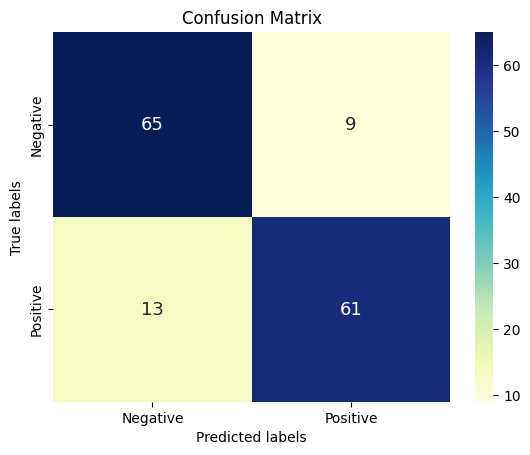

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test_resampled, prediksi_x, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.83      0.88      0.86        74
    Positive       0.87      0.82      0.85        74

    accuracy                           0.85       148
   macro avg       0.85      0.85      0.85       148
weighted avg       0.85      0.85      0.85       148



In [ ]:
#pengujian
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

Y_Pred = SVM.predict(X_test_resampled)
classifier_cv_score = cross_val_score(SVM, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("-- Confusion Matrix --")
print(confusion_matrix(y_test_resampled, Y_Pred))
print('\n')
print("-- Classification Report --")
print(classification_report(y_test_resampled, Y_Pred))
print('\n')
print("-- Scoring --")
print(classifier_cv_score)
print('\n')
print("-- Mean Accuracy Score --")
print( classifier_cv_score.mean())

-- Confusion Matrix --
[[65  9]
 [13 61]]


-- Classification Report --
              precision    recall  f1-score   support

     Negatif       0.83      0.88      0.86        74
     Positif       0.87      0.82      0.85        74

    accuracy                           0.85       148
   macro avg       0.85      0.85      0.85       148
weighted avg       0.85      0.85      0.85       148



-- Scoring --
[0.86440678 0.91525424 0.83050847 0.93220339 0.89830508 0.88135593
 0.88135593 0.86440678 0.88135593 0.86440678]


-- Mean Accuracy Score --
0.8813559322033899


## WorldCloud

In [ ]:
!pip install wordcloud
!pip install matplotlib


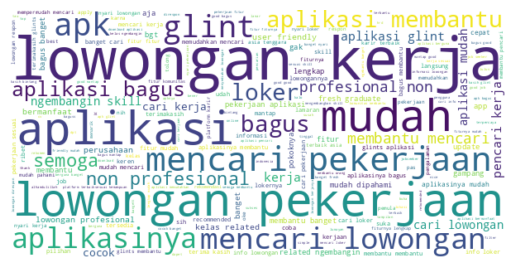

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

ulasan_positif = ulasan[ulasan['sentimen']=='Positif']

words_positif = ' '.join([twts for twts in ulasan_positif['remove_stopword']])
wordcloud_positif = WordCloud(width=600, height=300, max_font_size=200, background_color='white').generate(words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
# plt.title('Word Cloud Sentimen Positif')
plt.show()

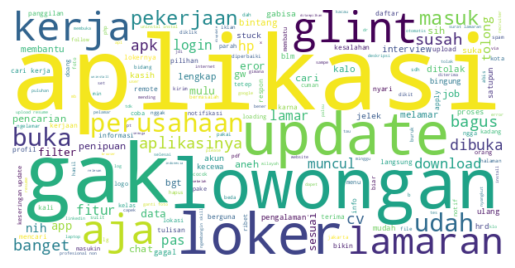

In [ ]:
ulasan_negatif = ulasan[ulasan['sentimen']=='Negatif']

words_negatif = ' '.join([twts for twts in ulasan_negatif['remove_stopword']])
wordcloud_negatif = WordCloud(width=600, height=300, max_font_size=200, background_color='white').generate(words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
# plt.title('Word Cloud Sentimen Negatif')
plt.show()

In [ ]:
ulasan_all = []

for review in ulasan_negatif['remove_stopword']:
  text = review.split()
  for token_review in text:
    ulasan_all.append(token_review)

In [ ]:
from nltk.probability import FreqDist

freq_dist = FreqDist(ulasan_all)
freq_dist

FreqDist({'aplikasi': 106, 'gak': 64, 'update': 49, 'lowongan': 43, 'loker': 41, 'kerja': 41, 'aja': 37, 'glints': 35, 'lamaran': 35, 'perusahaan': 31, ...})

In [ ]:
most_freq_df = pd.DataFrame(freq_dist.most_common(500), columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)
print(most_freq_df.head(10))

        words  count
0    aplikasi    106
1         gak     64
2      update     49
3    lowongan     43
4       loker     41
5       kerja     41
6         aja     37
7      glints     35
8     lamaran     35
9  perusahaan     31


In [ ]:
# kelas sentimen negatif
ulasan_negatif = ulasan[ulasan['sentimen']=='Negatif'].head(369)
print(ulasan_negatif)

            userName  score                at  \
1    Pengguna Google      5   02/12/2024 8:36   
2    Pengguna Google      5   02/07/2024 8:53   
3    Pengguna Google      5  02/20/2024 14:23   
4    Pengguna Google      3  01/17/2024 22:41   
5    Pengguna Google      5   01/27/2024 9:08   
..               ...    ...               ...   
386  Pengguna Google      5  10/19/2023 15:29   
387  Pengguna Google      5   12/29/2023 3:27   
388  Pengguna Google      5  09/21/2023 10:55   
389  Pengguna Google      4   02/15/2024 5:55   
390  Pengguna Google      5   03/19/2023 8:32   

                                               content  \
1    Wahhh bagus banget aplikasi nya sangat berguna...   
2    Aplikasinya bagus untuk pencari kerja karena b...   
3    Aplikasi yang mantep banget buat anak muda bar...   
4    Aplikasi nya ok, untuk mencari pekerjaan mudah...   
5    Apknya sudah lumayan bagus. namun masih ada ke...   
..                                                 ...   
386  